# Init.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Load Data

> Read data realtime and save to local

In [15]:
# Data Source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
from google.colab import drive
drive.mount('/content/drive')

data_name_june = "yellow_tripdata_2025-06.parquet"
data_name_july = "yellow_tripdata_2025-07.parquet"

raw_data_url_june = "/content/drive/MyDrive/boom-himatika-its-2025/data/yellow_tripdata_2025-06.parquet"
raw_data_url_july = "/content/drive/MyDrive/boom-himatika-its-2025/data/yellow_tripdata_2025-07.parquet"

df_june = pd.read_parquet(raw_data_url_june)
df_july = pd.read_parquet(raw_data_url_july)

import os

# Buat folder target di Google Drive kalau belum ada
save_dir = "/content/drive/MyDrive/boom-himatika-its-2025/data"
os.makedirs(save_dir, exist_ok=True)

# Simpan kembali hasil data
df_june.to_parquet(f"{save_dir}/{data_name_june}")
df_july.to_parquet(f"{save_dir}/{data_name_july}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Read Data
from google.colab import drive
drive.mount('/content/drive')

taxi_zone = pd.read_csv('/content/drive/MyDrive/boom-himatika-its-2025/data/taxi_zone_lookup.csv')
trip_data_06 = pd.read_parquet('/content/drive/MyDrive/boom-himatika-its-2025/data/yellow_tripdata_2025-06.parquet')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Preview Data
taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [19]:
# Preview Data
display(trip_data_06.head())
display(trip_data_06.tail())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,47.8,11.00,0.5,20.15,6.94,1.0,87.39,2.5,1.75,0.75
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,24.7,1.00,0.5,6.09,0.00,1.0,36.54,2.5,0.00,0.75
2,1,2025-06-01 00:43:47,2025-06-01 00:49:16,0.0,0.70,1.0,N,230,163,1,7.2,4.25,0.5,2.59,0.00,1.0,15.54,2.5,0.00,0.75
3,1,2025-06-01 00:01:15,2025-06-01 00:42:16,1.0,17.00,2.0,N,132,232,1,70.0,3.25,0.5,5.00,0.00,1.0,79.75,2.5,0.00,0.75
4,7,2025-06-01 00:16:32,2025-06-01 00:16:32,1.0,2.22,1.0,N,48,234,1,20.5,0.00,0.5,5.25,0.00,1.0,31.50,2.5,0.00,0.75


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
4322955,2,2025-06-30 23:43:46,2025-06-30 23:48:53,NaN,1.03,NaN,None,141,262,0,10.08,0.0,0.5,0.0,0.0,1.0,14.08,NaN,NaN,0.00
4322956,2,2025-06-30 23:19:59,2025-06-30 23:32:47,NaN,3.34,NaN,None,129,70,0,12.23,0.0,0.5,0.0,0.0,1.0,13.73,NaN,NaN,0.00
4322957,2,2025-06-30 23:35:59,2025-06-30 23:51:56,NaN,3.79,NaN,None,166,243,0,16.95,0.0,0.5,0.0,0.0,1.0,18.45,NaN,NaN,0.00
4322958,2,2025-06-30 23:00:28,2025-06-30 23:15:01,NaN,3.85,NaN,None,238,42,0,18.40,0.0,0.5,0.0,0.0,1.0,22.40,NaN,NaN,0.00
4322959,2,2025-06-30 23:10:59,2025-06-30 23:19:54,NaN,2.22,NaN,None,246,230,0,12.16,0.0,0.5,0.0,0.0,1.0,16.91,NaN,NaN,0.75


# Data Understanding  

## Data Inspection

### Taxi Zone

In [20]:
taxi_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [21]:
trip_data_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322960 entries, 0 to 4322959
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [22]:
# Check Missing Value (Taxi Zone)
taxi_zone.isnull().sum()

,0
LocationID,0
Borough,1
Zone,1
service_zone,2


In [23]:
# Preview Missing Value (Taxi Zone)
taxi_zone[taxi_zone["service_zone"].isnull()]

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NaN,NaN
264,265,NaN,Outside of NYC,NaN


In [24]:
# Check Duplicates (Taxi Zone)
taxi_zone.duplicated().sum()

np.int64(0)

In [25]:
# Check Missing Value (Taxi Zone)
taxi_zone.describe(include='all')

,LocationID,Borough,Zone,service_zone
count,265.000000,264,264,263
unique,NaN,7,261,4
top,NaN,Queens,Governor's Island/Ellis Island/Liberty Island,Boro Zone
freq,NaN,69,3,205
mean,133.000000,NaN,NaN,NaN
std,76.643112,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,67.000000,NaN,NaN,NaN
50%,133.000000,NaN,NaN,NaN
75%,199.000000,NaN,NaN,NaN


> Something weird with zone?  
> Zone mode is `Governor's Island/Ellis Island/Liberty Island` w/ freq. 3

In [26]:
# Preview taxi zone with same name but different Loc.ID
taxi_zone[taxi_zone["Zone"]=="Governor's Island/Ellis Island/Liberty Island"]

,LocationID,Borough,Zone,service_zone
102,103,Manhattan,Governor's Island/Ellis Island/Liberty Island,Yellow Zone
103,104,Manhattan,Governor's Island/Ellis Island/Liberty Island,Yellow Zone
104,105,Manhattan,Governor's Island/Ellis Island/Liberty Island,Yellow Zone


### Trip Data (06)

> **Univariate**

In [27]:
trip_data_06.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,4.322960e+06,4322960,4322960,3.110014e+06,4.322960e+06,3.110014e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,4.322960e+06,3.110014e+06,3.110014e+06,4.322960e+06
mean,1.887364e+00,2025-06-15 23:11:14.554075,2025-06-15 23:28:39.149324,1.298270e+00,7.478361e+00,2.599210e+00,1.600238e+02,1.601093e+02,8.912664e-01,1.897800e+01,1.129404e+00,4.772766e-01,2.752655e+00,5.100199e-01,9.545138e-01,2.738722e+01,2.181600e+00,1.588413e-01,5.332318e-01
min,1.000000e+00,2025-05-31 22:34:26,2025-05-31 22:43:36,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.900000e+02,-7.500000e+00,-2.174000e+01,-7.007000e+01,-1.090600e+02,-1.000000e+00,-9.942500e+02,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-06-08 05:03:50.750000,2025-06-08 05:19:49.500000,1.000000e+00,1.070000e+00,1.000000e+00,1.140000e+02,1.070000e+02,0.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.601000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-06-15 17:58:00,2025-06-15 18:15:00.500000,1.000000e+00,1.920000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.420000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,1.000000e+00,2.175000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-06-23 13:25:21,2025-06-23 13:44:24.250000,1.000000e+00,3.900000e+00,1.000000e+00,2.310000e+02,2.330000e+02,1.000000e+00,2.397000e+01,2.500000e+00,5.000000e-01,3.870000e+00,0.000000e+00,1.000000e+00,3.139000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-06-30 23:59:59,2025-07-01 22:36:42,9.000000e+00,2.612624e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.254780e+05,4.246000e+01,1.050000e+01,9.609400e+02,7.160500e+02,1.000000e+00,3.255285e+05,2.500000e+00,6.750000e+00,1.250000e+00
std,7.588800e-01,NaN,NaN,7.330376e-01,6.942321e+02,1.200176e+01,6.686664e+01,7.091911e+01,7.697741e-01,1.577826e+02,1.829902e+00,1.407145e-01,4.022928e+00,2.154179e+00,2.783022e-01,1.583694e+02,9.632568e-01,5.556769e-01,3.585827e-01


> What are looks suspicious?

- `VendorID` & `RatecodeID`: Some categories not listed in metadata
- `passenger_count`: 0?
- `trip_distance`:  max value look like doesn't make sense
- `fare_amount`: have minus & max value look like doesn't make sense
- `tip_amount`: have minus & max value look like doesn't make sense
- `.describe()` -> float / numerical not ID

#### `fare_amount`  


> **Tips**: _Start with Target Variable_

In [28]:
# Check outlier / distribution / unreasonable value
trip_data_06[["fare_amount"]].describe()

,fare_amount
count,4.322960e+06
mean,1.897800e+01
std,1.577826e+02
min,-9.900000e+02
25%,9.300000e+00
50%,1.420000e+01
75%,2.397000e+01
max,3.254780e+05


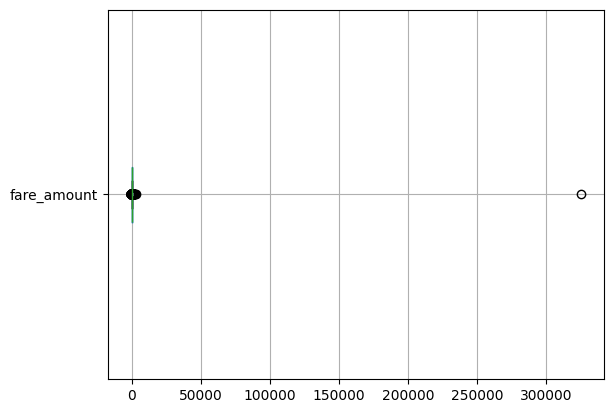

In [29]:
# Easy way to check outlier / distribution
trip_data_06[["fare_amount"]].boxplot(vert=False);
plt.show()

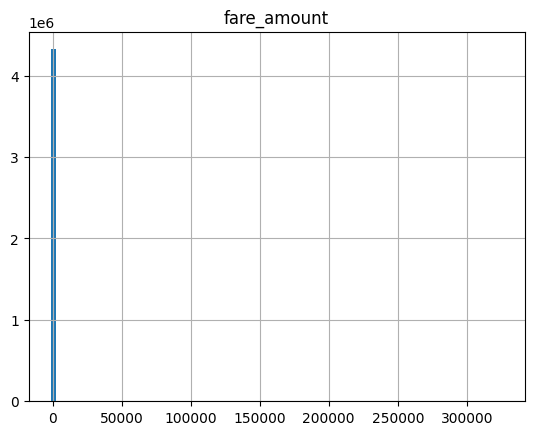

In [30]:
# Other way to check outlier / distribution
trip_data_06[["fare_amount"]].hist(bins=100);
plt.show()

In [31]:
# Preview minus fare_amount
trip_data_06[trip_data_06.fare_amount < 0].fare_amount.describe()

,fare_amount
count,275565.000000
mean,-9.729063
std,18.368671
min,-990.000000
25%,-6.500000
50%,-4.750000
75%,-4.750000
max,-0.010000


In [32]:
# Preview very high fare_amount
trip_data_06[
    trip_data_06.fare_amount > trip_data_06.fare_amount.quantile(.999999) # 99.9999% data
]#.fare_amount.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
1099841,1,2025-06-11 14:41:03,2025-06-11 16:14:37,3.0,20.60,2.0,N,161,132,2,325478.05,42.46,0.0,0.0,6.94,1.0,325528.45,2.5,0.00,0.75
1549025,1,2025-06-15 16:32:22,2025-06-15 16:32:27,1.0,0.00,6.0,N,132,132,3,3237.36,1.75,0.5,0.0,0.00,1.0,3240.61,0.0,1.75,0.00
2138566,2,2025-06-21 12:50:20,2025-06-25 09:15:46,1.0,339.07,4.0,N,184,265,2,2495.00,0.00,0.0,0.0,6.94,1.0,2502.94,0.0,0.00,0.00
2349217,7,2025-06-23 16:28:00,2025-06-23 16:28:00,1.0,2.29,5.0,N,138,93,4,1625.00,0.00,0.5,0.0,0.00,1.0,1633.25,0.0,6.75,0.00
2670501,2,2025-06-26 15:06:34,2025-06-26 15:06:42,1.0,17.30,1.0,N,193,7,2,2588.10,4.25,0.5,0.0,0.00,1.0,2593.85,0.0,0.00,0.00


> Notes:  

- Fare amount have negative value (e.g. -3.5, -5, -10, etc). is it data entry error, refund, discount, or what?
- Very high fare amount (e.g. > 500 or more than 99.9999% data) can be outlier or special case (e.g. long distance, luxury car, etc)
- Need to check with other columns (e.g. payment_type, extra, mta_tax, tip_amount, tolls_amount, total_amount)
- Need to check with trip_distance = 0

#### `VendorID`

In [33]:
# Check Unique Value
trip_data_06.VendorID.unique()

array([1, 2, 7, 6], dtype=int32)

In [34]:
# Check Freq. / Total Data for each VendorID (manual way)
for vendor_id in trip_data_06.VendorID.unique():
    vendor_id_count = trip_data_06[trip_data_06.VendorID == vendor_id].shape[0]
    print(f"Total Vendor ID {vendor_id} in data: {vendor_id_count} rows")

Total Vendor ID 1 in data: 830851 rows
Total Vendor ID 2 in data: 3423020 rows
Total Vendor ID 7 in data: 67573 rows
Total Vendor ID 6 in data: 1516 rows


In [35]:
# Check Freq. / Total Data for each VendorID (better way)
tmp = trip_data_06.copy() # NOTE: This is just a safe way
tmp["count"] = 1 # Dummy value
tmp.groupby(["VendorID"]).count()["count"]

,count
VendorID,
1,830851
2,3423020
6,1516
7,67573


In [36]:
# Check Freq. / Total Data for each VendorID (better way)
trip_data_06.VendorID.value_counts(
    # normalize=True
) # * 100

,count
VendorID,
2,3423020
1,830851
7,67573
6,1516


> Question: What should we do with VendorID except 1 and 2?

#### `trip_distance`

In [37]:
# Preview trip_distance statistical description again
trip_data_06.trip_distance.describe()

,trip_distance
count,4.322960e+06
mean,7.478361e+00
std,6.942321e+02
min,0.000000e+00
25%,1.070000e+00
50%,1.920000e+00
75%,3.900000e+00
max,2.612624e+05


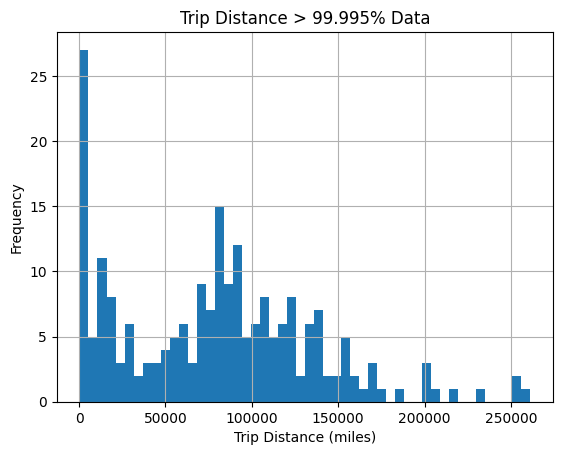

,trip_distance
count,217.000000
mean,79320.647696
std,57666.017090
min,232.640000
25%,27492.670000
50%,80385.550000
75%,115186.980000
max,261262.390000


In [38]:
# Filter very long trip_distance
very_long_trip = trip_data_06[
    trip_data_06.trip_distance > trip_data_06.trip_distance.quantile(.99995) # 99.9999% data
].copy()

# Plot very long trip_distance
very_long_trip.trip_distance.hist(bins=50);
plt.title('Trip Distance > 99.995% Data');
plt.xlabel('Trip Distance (miles)');
plt.ylabel('Frequency');
plt.show();
very_long_trip.trip_distance.describe()

> **Multivariate Analysis**

,fare_amount,trip_distance
fare_amount,1.000000,0.000655
trip_distance,0.000655,1.000000


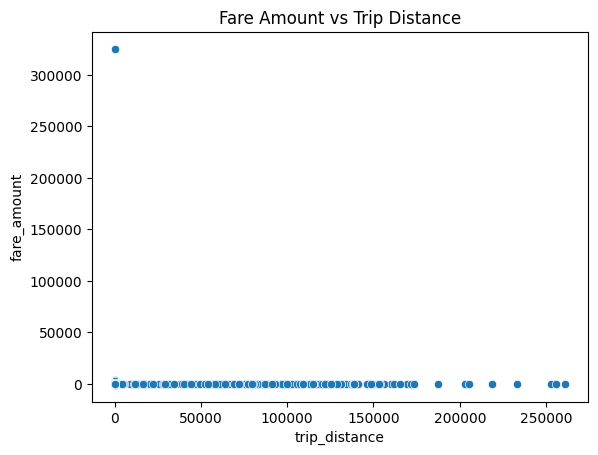

In [39]:
# Check fare_amount correlation with trip_distance
display(trip_data_06[["fare_amount", "trip_distance"]].corr())
sns.scatterplot(
    data=trip_data_06,
    x="trip_distance",
    y="fare_amount"
)\
.set_title("Fare Amount vs Trip Distance");
plt.show()

#### `passenger_count`

In [40]:
# Preview passenger_count statistical description
trip_data_06.passenger_count.describe()

,passenger_count
count,3.110014e+06
mean,1.298270e+00
std,7.330376e-01
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,9.000000e+00


In [41]:
trip_data_06.passenger_count.isnull().sum()

np.int64(1212946)

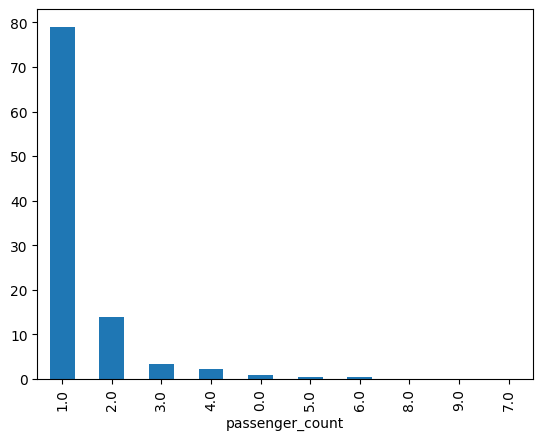

In [42]:
# Check Passenger Count Distribution
(trip_data_06\
    .value_counts(
        "passenger_count",
        normalize=True
    ) *100
).plot(kind="bar");
plt.show();

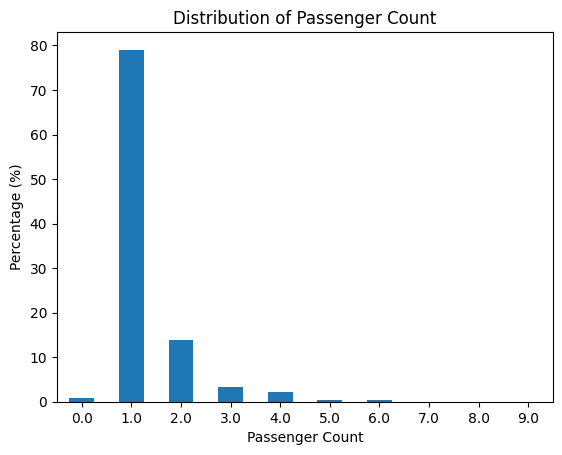

In [43]:
# Better visualization
(trip_data_06.value_counts("passenger_count", normalize=True) *100).sort_index().plot(kind="bar", rot=0);
plt.xlabel("Passenger Count");
plt.ylabel("Percentage (%)");
plt.title("Distribution of Passenger Count");
plt.show();

In [44]:
# Average fare_amount by passenger_count.
# Alternative 1: by grouping
trip_data_06[[
    "fare_amount",
    "passenger_count"
]].groupby("passenger_count").mean()

,fare_amount
passenger_count,
0.0,17.097007
1.0,18.523025
2.0,21.264003
3.0,23.838265
4.0,24.048862
5.0,17.493328
6.0,17.668852
7.0,84.545000
8.0,105.406667


In [45]:
# Average fare_amount by passenger_count.
# Alternative 2: by pivot_table
# NOTE: uncomment the plot code to visualize
trip_data_06.pivot_table(
    values="fare_amount",
    index="passenger_count",
    aggfunc="mean"
)#\
#.plot(kind="bar");
#plt.show()

,fare_amount
passenger_count,
0.0,17.097007
1.0,18.523025
2.0,21.264003
3.0,23.838265
4.0,24.048862
5.0,17.493328
6.0,17.668852
7.0,84.545000
8.0,105.406667


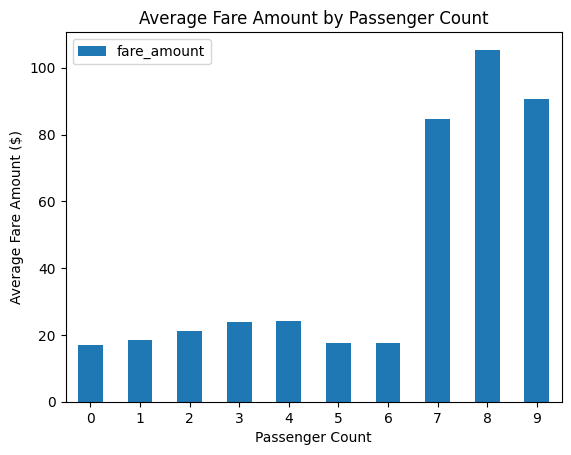

In [46]:
# For better visualization
# Filter data, remove NaN, convert to int, than plot
tmp_df = trip_data_06[["fare_amount", "passenger_count"]].copy()
tmp_df.dropna(subset=["passenger_count"], inplace=True)
tmp_df.passenger_count = tmp_df.passenger_count.astype(int)
tmp_df.pivot_table(
    values="fare_amount",
    index="passenger_count",
    aggfunc="mean"
)\
.plot(kind="bar", rot=0);
plt.xlabel("Passenger Count");
plt.ylabel("Average Fare Amount ($)");
plt.title("Average Fare Amount by Passenger Count");
plt.show()

#### `<Other Features>`

In [ ]:
# NOTE: please explore it yourself ;)


#### **Checkpoints**:

What you have learned so far (in terms of idea):
1. Understand the data (data types, missing values, duplicates, basic statistics)
2. Identify potential issues (outliers, unreasonable values)
3. Works with numerical and categorical variables

What you have learned so far (in terms of technical):
1. Simple visualization (boxplot, histogram)
2. Statistical summary / descriptive for numerical (mean, median, std, min, max, quantiles)
3. Statistical summary / descriptive for categorical (mode, freq., n_unique)
4. Filtering Dataframe
5. Univariate analysis (focus on one variable at a time)
6. Multivariate analysis (focus on more than one variable)
7. Data aggregation
5. Create visualization (basic and better)

# Pre-processing

## Combine Data

In [47]:
# Concat two months data
trip_data_07 = pd.read_parquet('./data/yellow_tripdata_2025-07.parquet')
trip_data = pd.concat([trip_data_06, trip_data_07])

In [48]:
# Merge with taxi zone data
trip_data = trip_data.merge(taxi_zone, left_on='PULocationID', right_on='LocationID', how='left')
trip_data = trip_data.merge(taxi_zone, left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_PULocation', '_DOLocation'))

In [49]:
display(trip_data.head(2))
display(trip_data.tail(2))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Airport_fee,cbd_congestion_fee,LocationID_PULocation,Borough_PULocation,Zone_PULocation,service_zone_PULocation,LocationID_DOLocation,Borough_DOLocation,Zone_DOLocation,service_zone_DOLocation
0,1,2025-06-01 00:02:50,2025-06-01 00:39:51,1.0,10.00,1.0,N,138,50,1,...,1.75,0.75,138,Queens,LaGuardia Airport,Airports,50,Manhattan,Clinton West,Yellow Zone
1,2,2025-06-01 00:11:27,2025-06-01 00:35:35,1.0,3.93,1.0,N,158,237,1,...,0.00,0.75,158,Manhattan,Meatpacking/West Village West,Yellow Zone,237,Manhattan,Upper East Side South,Yellow Zone


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Airport_fee,cbd_congestion_fee,LocationID_PULocation,Borough_PULocation,Zone_PULocation,service_zone_PULocation,LocationID_DOLocation,Borough_DOLocation,Zone_DOLocation,service_zone_DOLocation
8221921,2,2025-07-31 23:13:56,2025-07-31 23:25:09,NaN,2.09,NaN,None,148,170,0,...,NaN,0.75,148,Manhattan,Lower East Side,Yellow Zone,170,Manhattan,Murray Hill,Yellow Zone
8221922,2,2025-07-31 23:54:09,2025-08-01 00:05:44,NaN,2.88,NaN,None,163,249,0,...,NaN,0.75,163,Manhattan,Midtown North,Yellow Zone,249,Manhattan,West Village,Yellow Zone


### Tips & Trick: **Optimization Dtype**

In [50]:
# Store original data (for comparation purpose)
trip_data_ori = trip_data.copy()

# Columns that should be int
should_be_int = [
    "VendorID",
    "passenger_count",
    "RatecodeID",
    "payment_type",
    "PULocationID",
    "DOLocationID",
]

# Convert to int
for col in should_be_int:
    trip_data[col] = trip_data[col].fillna(-1).astype(int) # Pandas nullable integer type

# Optimize dataset (in term of memory usage)
for col in trip_data.select_dtypes("float64").columns:
    trip_data[col] = pd.to_numeric(trip_data[col], downcast="float")
for col in trip_data.select_dtypes("int32").columns:
    trip_data[col] = pd.to_numeric(trip_data[col], downcast="integer")

In [51]:
trip_data_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221923 entries, 0 to 8221922
Data columns (total 28 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   VendorID                 int32         
 1   tpep_pickup_datetime     datetime64[us]
 2   tpep_dropoff_datetime    datetime64[us]
 3   passenger_count          float64       
 4   trip_distance            float64       
 5   RatecodeID               float64       
 6   store_and_fwd_flag       object        
 7   PULocationID             int32         
 8   DOLocationID             int32         
 9   payment_type             int64         
 10  fare_amount              float64       
 11  extra                    float64       
 12  mta_tax                  float64       
 13  tip_amount               float64       
 14  tolls_amount             float64       
 15  improvement_surcharge    float64       
 16  total_amount             float64       
 17  congestion_surcharge     fl

In [52]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221923 entries, 0 to 8221922
Data columns (total 28 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   VendorID                 int64         
 1   tpep_pickup_datetime     datetime64[us]
 2   tpep_dropoff_datetime    datetime64[us]
 3   passenger_count          int64         
 4   trip_distance            float64       
 5   RatecodeID               int64         
 6   store_and_fwd_flag       object        
 7   PULocationID             int64         
 8   DOLocationID             int64         
 9   payment_type             int64         
 10  fare_amount              float64       
 11  extra                    float32       
 12  mta_tax                  float32       
 13  tip_amount               float32       
 14  tolls_amount             float32       
 15  improvement_surcharge    float32       
 16  total_amount             float64       
 17  congestion_surcharge     fl

## Feature Engineering

In [53]:
# Create derrived features
trip_data["pickup_hour"] =  trip_data["tpep_pickup_datetime"].dt.hour
trip_data["pickup_day"] =  trip_data["tpep_pickup_datetime"].dt.weekday

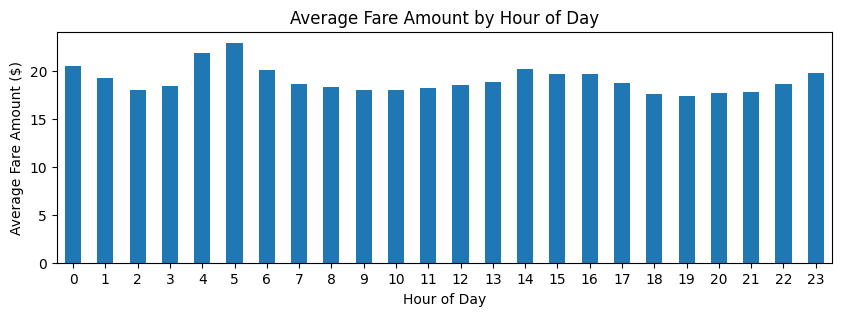

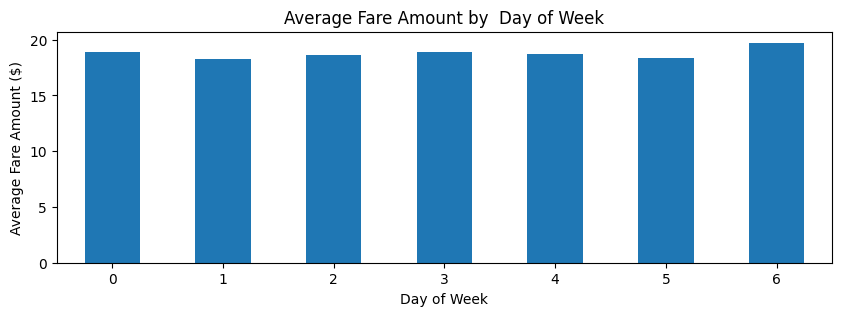

In [54]:
# Average fare_amount by pickup_hour
trip_data.pivot_table(
    values="fare_amount",
    index="pickup_hour",
    aggfunc="mean"
).plot(kind="bar", rot=0, figsize=(10,3), legend=False);
plt.xlabel("Hour of Day");
plt.ylabel("Average Fare Amount ($)");
plt.title("Average Fare Amount by Hour of Day");
plt.show()

# Average fare_amount by pickup_day
trip_data.pivot_table(
    values="fare_amount",
    index="pickup_day",
    aggfunc="mean"
).plot(kind="bar", rot=0, figsize=(10,3), legend=False);
plt.xlabel("Day of Week");
plt.ylabel("Average Fare Amount ($)");
plt.title("Average Fare Amount by  Day of Week");
plt.show()

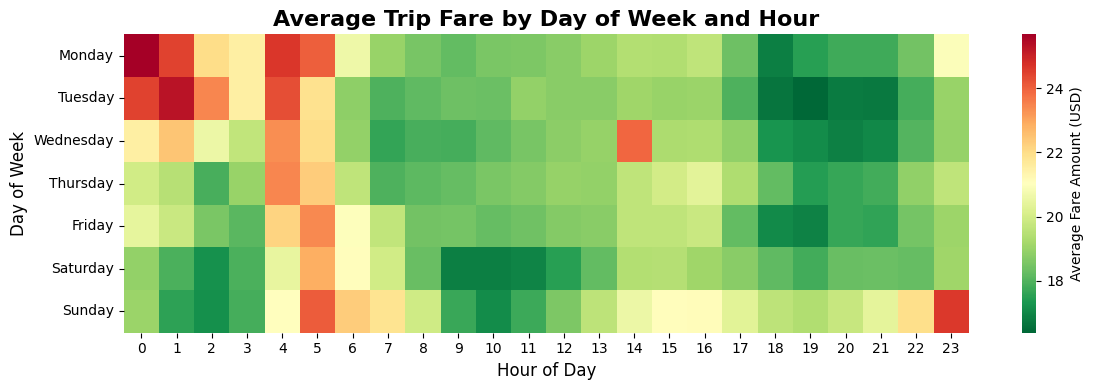

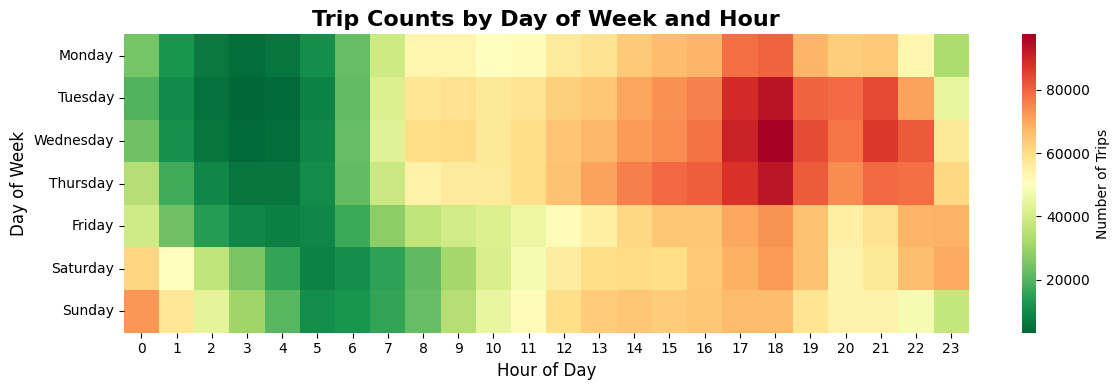

In [55]:
# Create a copy of selected columns to analyze time-related patterns
time_perspective = trip_data[["tpep_pickup_datetime", "fare_amount"]].copy()

# Extract hour of day and weekday number (0 = Monday, 6 = Sunday)
time_perspective["hour"] = time_perspective["tpep_pickup_datetime"].dt.hour
time_perspective["weekday"] = time_perspective["tpep_pickup_datetime"].dt.weekday
time_perspective["date"] = time_perspective["tpep_pickup_datetime"].dt.date

# Map weekday numbers to weekday names (e.g., 0 → Monday)
weekday_map = {i: calendar.day_name[i] for i in range(7)}
time_perspective["weekday_name"] = time_perspective["weekday"].map(weekday_map)

# ==== 1) Average fare amount by day of week and hour ====

# Create a pivot table for the average fare
heatmap_fare = time_perspective.pivot_table(
    index="weekday_name",
    columns="hour",
    values="fare_amount",
    aggfunc="mean"
)

# Sort rows from Monday to Sunday
heatmap_fare = heatmap_fare.reindex([calendar.day_name[i] for i in range(7)])

# Plot heatmap of average fares
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_fare,
    cmap="RdYlGn_r",
    cbar_kws={"label": "Average Fare Amount (USD)"}
)

# Add labels and title
ax.set_xlabel("Hour of Day", fontsize=12)
ax.set_ylabel("Day of Week", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("Average Trip Fare by Day of Week and Hour", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

# ==== 2) Trip counts by day of week and hour ====

# Create a pivot table for the number of trips
heatmap_counts = time_perspective.pivot_table(
    index="weekday_name",
    columns="hour",
    values="date",
    aggfunc="count"
)

# Sort rows from Monday to Sunday
heatmap_counts = heatmap_counts.reindex([calendar.day_name[i] for i in range(7)])

# Plot heatmap of trip counts
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_counts,
    cmap="RdYlGn_r",
    cbar_kws={"label": "Number of Trips"}
)

# Add labels and title
ax.set_xlabel("Hour of Day", fontsize=12)
ax.set_ylabel("Day of Week", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title("Trip Counts by Day of Week and Hour", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


## Feature Selection

In [56]:
target = "fare_amount"
features = [
    "trip_distance",
    "VendorID",
    "passenger_count",
    "pickup_hour",
    "pickup_day",

]

trip_data_clean = trip_data[features + [target]].copy()
trip_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221923 entries, 0 to 8221922
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   trip_distance    float64
 1   VendorID         int64  
 2   passenger_count  int64  
 3   pickup_hour      int32  
 4   pickup_day       int32  
 5   fare_amount      float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 313.6 MB


In [57]:
# Optimize dataset (in term of memory usage/size)
trip_data_clean.VendorID = trip_data_clean.VendorID.astype('uint8')
trip_data_clean.pickup_hour = trip_data_clean.pickup_hour.astype('uint8')
trip_data_clean.pickup_day = trip_data_clean.pickup_day.astype('uint8')
trip_data_clean.fare_amount = trip_data_clean.fare_amount.astype('float32')
trip_data_clean.trip_distance = trip_data_clean.trip_distance.astype('float32')
trip_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221923 entries, 0 to 8221922
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   trip_distance    float32
 1   VendorID         uint8  
 2   passenger_count  int64  
 3   pickup_hour      uint8  
 4   pickup_day       uint8  
 5   fare_amount      float32
dtypes: float32(2), int64(1), uint8(3)
memory usage: 149.0 MB


> Notes: _We shrank the data size by over **94%**, dropping **from ~1.6 GB to only ~94 MB**._

## Data Cleaning

### Handle Duplicates (if any)

In [58]:
# Check duplicates
total_duplicates_data = trip_data_clean.duplicated().sum()
print(f"Total Duplicates Data: {total_duplicates_data.sum()} rows / {total_duplicates_data / trip_data_clean.shape[0] * 100:.2f}%")

# Preview duplicates
trip_data_clean[trip_data_clean.duplicated(keep=False)].sort_values(by=target)

Total Duplicates Data: 3664063 rows / 44.56%


,trip_distance,VendorID,passenger_count,pickup_hour,pickup_day,fare_amount
1486853,0.0,2,1,21,5,-700.0
4698139,0.0,2,1,21,5,-700.0
1486855,0.0,2,1,21,5,-500.0
1487232,0.0,2,1,21,5,-500.0
6124116,0.0,2,1,23,6,-500.0
...,...,...,...,...,...,...
1580711,0.0,2,1,23,6,500.0
1486854,0.0,2,1,21,5,700.0
4698140,0.0,2,1,21,5,700.0
1986603,0.0,1,1,20,3,999.0


In [59]:
# Keep all if want to analyze duplicates later
dup_data = trip_data_clean.duplicated(keep=False)

# Drop duplicates
trip_data_clean = trip_data_clean.drop_duplicates(keep="first")
trip_data_clean.reset_index(drop=True, inplace=True)
trip_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4557860 entries, 0 to 4557859
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   trip_distance    float32
 1   VendorID         uint8  
 2   passenger_count  int64  
 3   pickup_hour      uint8  
 4   pickup_day       uint8  
 5   fare_amount      float32
dtypes: float32(2), int64(1), uint8(3)
memory usage: 82.6 MB


### Handling Missing Value (if any)

In [60]:
# Check missing value
trip_data_clean.isnull().sum()

,0
trip_distance,0
VendorID,0
passenger_count,0
pickup_hour,0
pickup_day,0
fare_amount,0


> Notes: remember that we change / fillna by -1 earlier

In [61]:
# Review data with passenger_count missing value vs complete
display(trip_data_clean[trip_data_clean.passenger_count.isnull()].describe())
display(trip_data_clean[~trip_data_clean.passenger_count.isnull()].describe())

,trip_distance,VendorID,passenger_count,pickup_hour,pickup_day,fare_amount
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


,trip_distance,VendorID,passenger_count,pickup_hour,pickup_day,fare_amount
count,4.557860e+06,4.557860e+06,4.557860e+06,4.557860e+06,4.557860e+06,4.557860e+06
mean,1.157594e+01,1.974554e+00,4.640480e-01,1.366767e+01,3.126906e+00,2.372709e+01
std,9.170880e+02,8.795304e-01,1.466937e+00,6.512989e+00,1.986418e+00,1.534388e+02
min,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.591300e+03
25%,1.540000e+00,2.000000e+00,-1.000000e+00,9.000000e+00,1.000000e+00,1.210000e+01
50%,2.970000e+00,2.000000e+00,1.000000e+00,1.500000e+01,3.000000e+00,1.979000e+01
75%,6.160000e+00,2.000000e+00,1.000000e+00,1.900000e+01,5.000000e+00,3.100000e+01
max,3.979944e+05,7.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,3.254781e+05


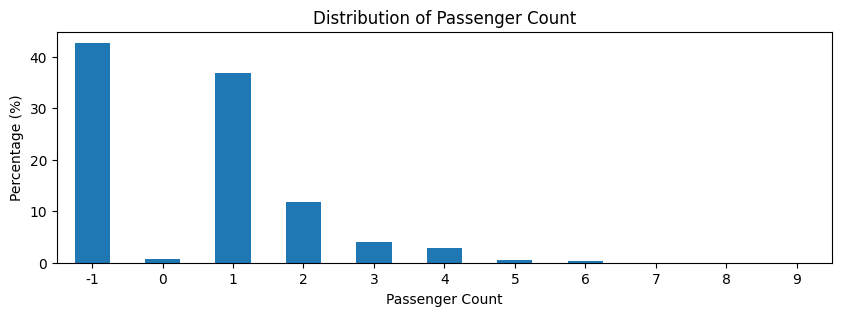

In [62]:
# Check Mode for passenger_count
(trip_data_clean.passenger_count.value_counts(normalize=True)*100).sort_index().plot(kind="bar", rot=0, figsize=(10,3));
plt.xlabel("Passenger Count");
plt.ylabel("Percentage (%)");
plt.title("Distribution of Passenger Count");
plt.show()

In [63]:
# Fillna with mode
mode_passenger_count = 1
trip_data_clean.passenger_count = trip_data_clean.passenger_count.replace(-1, mode_passenger_count)

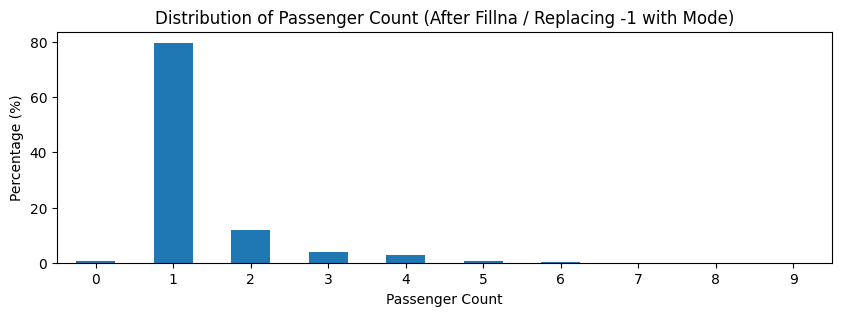

In [64]:
# Check Mode for passenger_count
(trip_data_clean.passenger_count.value_counts(normalize=True)*100).sort_index().plot(kind="bar", rot=0, figsize=(10,3));
plt.xlabel("Passenger Count");
plt.ylabel("Percentage (%)");
plt.title("Distribution of Passenger Count (After Fillna / Replacing -1 with Mode)");
plt.show()

### Handling Outlier (if any)

Statistical Description of `trip_distance`:
count    4557860.00
mean          11.58
std          917.09
min            0.00
25%            1.54
50%            2.97
75%            6.16
max       397994.38
Name: trip_distance, dtype: float64


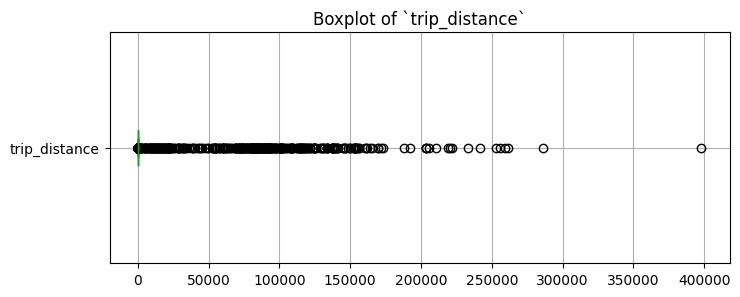



Statistical Description of `passenger_count`:
count    4557860.00
mean           1.32
std            0.79
min            0.00
25%            1.00
50%            1.00
75%            1.00
max            9.00
Name: passenger_count, dtype: float64


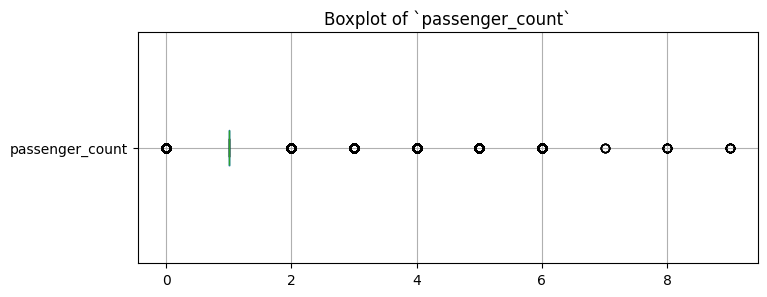



Statistical Description of `fare_amount`:
count    4557860.00
mean          23.73
std          153.44
min        -1591.30
25%           12.10
50%           19.79
75%           31.00
max       325478.06
Name: fare_amount, dtype: float64


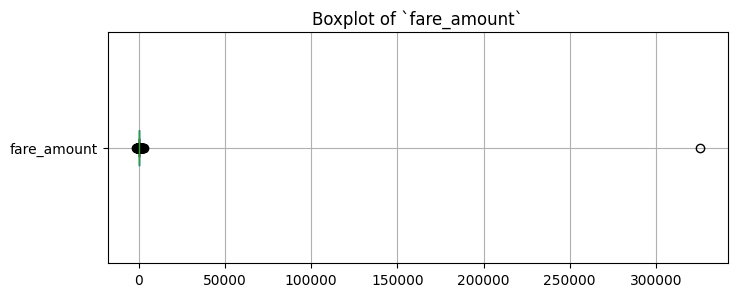

In [65]:
# trip_data_clean.describe()# .corr()[[target]].sort_values(by=[target], ascending=False).style.background_gradient(cmap='bwr')
numerical_features = [
    'trip_distance',
    'passenger_count',
    'fare_amount',
]
categorical_features = [
    'VendorID',
    'pickup_hour',
    'pickup_day',
]
for col in numerical_features:
    print(f"Statistical Description of `{col}`:")
    print(trip_data_clean[col].describe().round(2))
    trip_data_clean[[col]].boxplot(rot=0, figsize=(8,3), vert=False);
    plt.title(f"Boxplot of `{col}`");
    plt.show()
    print("\n")

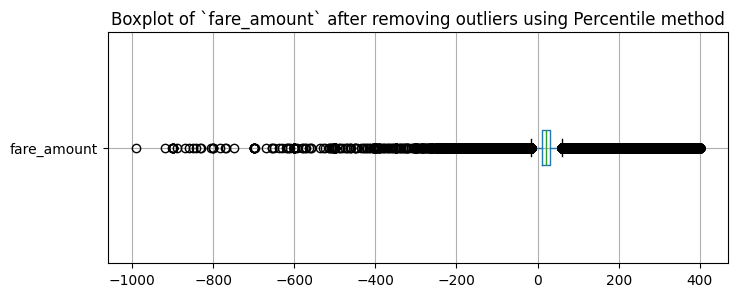

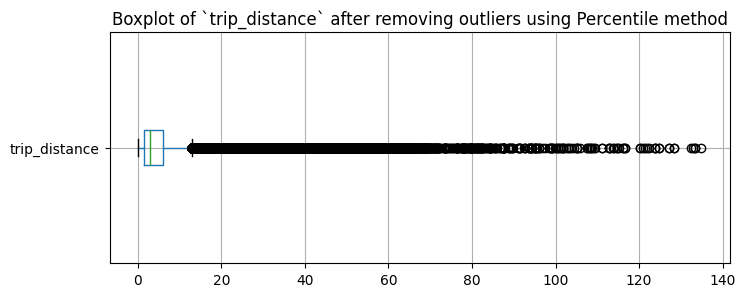



Reduced 823 rows to  0.02% rows after removing outliers using Percentile method.


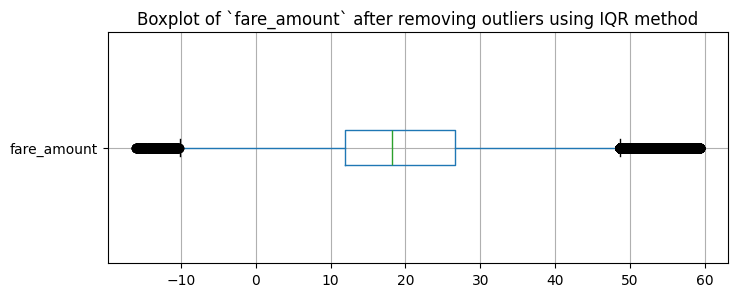

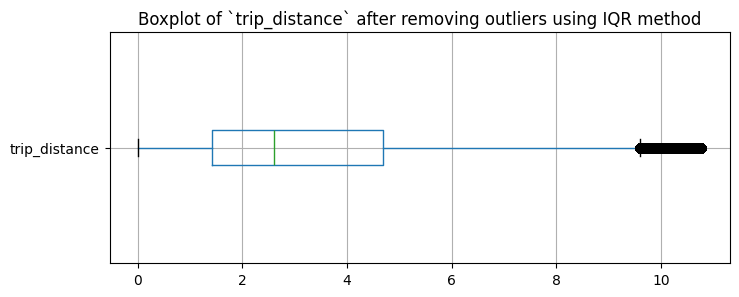



Reduced 570372 rows to  12.51% rows after removing outliers using IQR method.


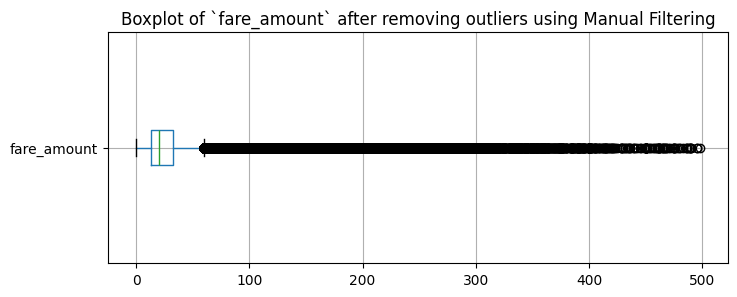

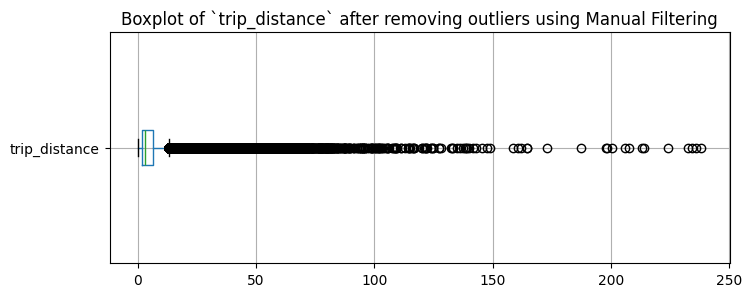



Reduced 411228 rows to  9.02% rows after removing outliers using Manual Filtering.


In [66]:
# Option 1: Remove outliers using IQR rule
def remove_outliers_iqr(df, columns, multiplier=1.5):
    """
    Remove outliers from selected numeric columns using the IQR rule.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame.
    columns : list of str
        List of column names where you want to remove outliers.
    multiplier : float, optional, default=1.5
        The IQR multiplier (1.5 is common; use 3.0 for more relaxed filtering).

    Returns
    -------
    pandas.DataFrame
        A copy of the DataFrame with outliers removed.
    """
    clean_df = df.copy()

    for col in columns:
        if col not in clean_df.columns:
            raise KeyError(f"Column '{col}' not found in DataFrame.")

        if not pd.api.types.is_numeric_dtype(clean_df[col]):
            raise TypeError(f"Column '{col}' is not numeric.")

        q1 = clean_df[col].quantile(0.25)
        q3 = clean_df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - multiplier * iqr
        upper = q3 + multiplier * iqr

        clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]

    return clean_df

filtered_with_iqr = remove_outliers_iqr(trip_data_clean, ["fare_amount", "trip_distance"])
filtered_with_iqr.reset_index(drop=True, inplace=True)

# Option 2: Remove outliers using Percentile method
MAX_PERCENTILE = .9999
trip_data_clean.fare_amount.quantile(MAX_PERCENTILE), trip_data_clean.trip_distance.quantile(MAX_PERCENTILE)
filtered_with_percentile = trip_data_clean[
    (trip_data_clean.fare_amount <= trip_data_clean.fare_amount.quantile(MAX_PERCENTILE)) &
    (trip_data_clean.trip_distance <= trip_data_clean.trip_distance.quantile(MAX_PERCENTILE))
]
filtered_with_percentile.reset_index(drop=True, inplace=True)

# Option 3: Manual filtering
filtered_manual = trip_data_clean[
    (trip_data_clean.fare_amount > 0) &
    (trip_data_clean.fare_amount < 500) &
    (trip_data_clean.trip_distance > 0) &
    (trip_data_clean.trip_distance < 250)
]
filtered_manual.reset_index(drop=True, inplace=True)

# Preview filtered data
for col in ["fare_amount", "trip_distance"]:
    filtered_with_percentile[[col]].boxplot(rot=0, figsize=(8,3), vert=False);
    plt.title(f"Boxplot of `{col}` after removing outliers using Percentile method");
    plt.show()
    print("\n")
print(f"Reduced {trip_data_clean.shape[0]-filtered_with_percentile.shape[0]} rows to ",
      f"{(trip_data_clean.shape[0]-filtered_with_percentile.shape[0])/trip_data_clean.shape[0]*100:.2f}% rows after removing outliers using Percentile method.")

for col in ["fare_amount", "trip_distance"]:
    filtered_with_iqr[[col]].boxplot(rot=0, figsize=(8,3), vert=False);
    plt.title(f"Boxplot of `{col}` after removing outliers using IQR method");
    plt.show()
    print("\n")
print(f"Reduced {trip_data_clean.shape[0]-filtered_with_iqr.shape[0]} rows to ",
      f"{(trip_data_clean.shape[0]-filtered_with_iqr.shape[0])/trip_data_clean.shape[0]*100:.2f}% rows after removing outliers using IQR method.")

for col in ["fare_amount", "trip_distance"]:
    filtered_manual[[col]].boxplot(rot=0, figsize=(8,3), vert=False);
    plt.title(f"Boxplot of `{col}` after removing outliers using Manual Filtering");
    plt.show()
    print("\n")
print(f"Reduced {trip_data_clean.shape[0]-filtered_manual.shape[0]} rows to ",
      f"{(trip_data_clean.shape[0]-filtered_manual.shape[0])/trip_data_clean.shape[0]*100:.2f}% rows after removing outliers using Manual Filtering.")


In [67]:
# Compare correlation after outlier removal
display(filtered_with_iqr.corr()[[target]].drop(target).sort_values(by=[target], ascending=False).style.background_gradient(cmap='bwr'))
display(filtered_with_percentile.corr()[[target]].drop(target).sort_values(by=[target], ascending=False).style.background_gradient(cmap='bwr'))
display(filtered_manual.corr()[[target]].drop(target).sort_values(by=[target], ascending=False).style.background_gradient(cmap='bwr'))

,fare_amount
trip_distance,0.681789
pickup_hour,0.024050
pickup_day,-0.018399
passenger_count,-0.083761
VendorID,-0.091296


,fare_amount
trip_distance,0.665114
pickup_hour,0.006071
passenger_count,-0.001973
pickup_day,-0.019845
VendorID,-0.068431


,fare_amount
trip_distance,0.886357
pickup_hour,0.007764
passenger_count,-0.016853
pickup_day,-0.026639
VendorID,-0.077437


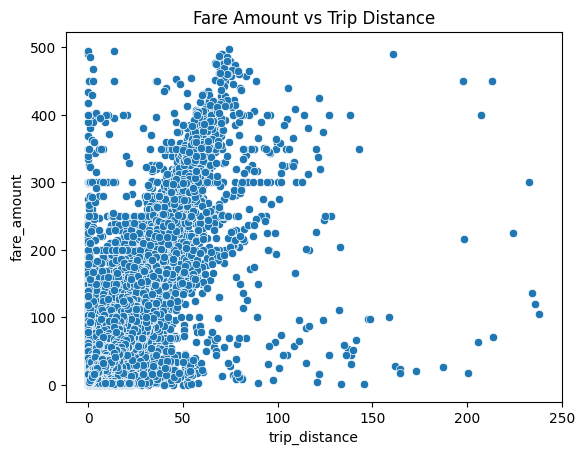

In [68]:
# Check fare_amount correlation with trip_distance (after outlier removal) with viz.
sns.scatterplot(
    data=filtered_manual,
    x="trip_distance",
    y="fare_amount"
)\
.set_title("Fare Amount vs Trip Distance");

plt.show()

## Preview Clean Data

In [69]:
filtered_manual.sample(10)

,trip_distance,VendorID,passenger_count,pickup_hour,pickup_day,fare_amount
1184566,2.360000,2,4,17,5,20.500000
2295002,1.470000,2,1,21,1,21.980000
3945596,1.780000,2,1,22,3,16.780001
3529265,0.780000,2,1,11,1,6.580000
2948257,2.510000,2,1,8,3,12.100000
2879410,17.150000,2,1,0,1,70.000000
2478274,18.559999,2,4,8,1,70.000000
4079610,0.500000,1,1,12,1,16.320000
3661427,1.250000,2,1,13,6,10.870000
480833,0.690000,2,1,13,5,7.200000


In [70]:
filtered_manual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4146632 entries, 0 to 4146631
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   trip_distance    float32
 1   VendorID         uint8  
 2   passenger_count  int64  
 3   pickup_hour      uint8  
 4   pickup_day       uint8  
 5   fare_amount      float32
dtypes: float32(2), int64(1), uint8(3)
memory usage: 75.1 MB


In [71]:
filtered_manual.describe()

,trip_distance,VendorID,passenger_count,pickup_hour,pickup_day,fare_amount
count,4.146632e+06,4.146632e+06,4.146632e+06,4.146632e+06,4.146632e+06,4.146632e+06
mean,4.858751e+00,1.973035e+00,1.331346e+00,1.362930e+01,3.140824e+00,2.617123e+01
std,4.986213e+00,9.138137e-01,8.055241e-01,6.531368e+00,1.988056e+00,1.970156e+01
min,1.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02
25%,1.640000e+00,2.000000e+00,1.000000e+00,9.000000e+00,1.000000e+00,1.350000e+01
50%,3.050000e+00,2.000000e+00,1.000000e+00,1.400000e+01,3.000000e+00,2.058000e+01
75%,6.270000e+00,2.000000e+00,1.000000e+00,1.900000e+01,5.000000e+00,3.221000e+01
max,2.381600e+02,7.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,4.979000e+02


#### **Checkpoints**:

What you have learned so far (in terms of idea):
1. Handling duplicate value
2. Handling missing value
3. Handling outlier

# Export Data

In [72]:
filtered_manual.to_parquet('./data/trip_data_clean.parquet', index=False)
filtered_manual.to_csv('./data/trip_data_clean.csv', index=False)